* Assignment 1
* Student Name : Aswani Pottathuparambil Unnikrishnan
* Student ID : 8858117

1.	Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to  have an illness (Parkinson’s disease).
    A model of this decision problem could be used by a program to provide decision support to medical professionals.
  	
   You can follow the following steps :
  	
   •	Data Analysis
  	
   •	Data Preprocessing
  	
   •	Data Standardization
  	
   •	Model Training
  	
   •	Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.

   •	Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

The objective of this type of binary classification problem is to determine whether a patient has a chance to have a diagnosis of Parkinson's disease (class label 1) or not (class label 0) based on the symptoms and features present. 

•	1. Data Analysis

In [63]:
# Load the dataset
pd_data = pd.read_csv('C:/Users/aswan/OneDrive/Desktop/AIML/pd_speech_features.csv', header=1)
# Display 5 samples randomly
pd_data.sample(5)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
221,73,1,0.81179,0.65352,0.49225,149,148,0.012966,0.000119,0.00212,...,52.7085,5.0406,2.7179,11.8876,17.4626,7.0548,4.8529,4.6052,3.9747,0
664,221,0,0.86378,0.62732,0.56231,493,492,0.003918,0.000087,0.00089,...,6.6572,3.7224,3.0976,2.5012,2.5699,3.8843,3.5563,2.8401,3.2706,0
674,224,0,0.84236,0.60718,0.37996,428,427,0.004509,0.000030,0.00068,...,34.2262,11.2557,4.7290,6.5325,16.2620,9.0620,5.3119,4.2702,6.1970,1
721,240,0,0.85474,0.74146,0.30378,376,375,0.005132,0.000046,0.00076,...,50.5058,37.7190,21.5737,24.5017,39.8388,44.0667,35.5768,24.1846,70.7515,1
648,216,0,0.78102,0.66945,0.40831,358,357,0.005388,0.000075,0.00112,...,107.3453,86.8414,89.2767,70.2395,44.3228,27.1005,18.2890,14.8293,5.2528,0


In [64]:
# Display the dataset size
pd_data.shape

(756, 755)

In [65]:
# Get dataset details
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [66]:
# Find class feature distribution
print(pd_data['class'].value_counts())

class
1    564
0    192
Name: count, dtype: int64


* 2. Data Preprocessing

In [67]:
# Check null values
pd_data.isnull().values.any()

False

In [68]:
# Remove duplicate values
print(f'Original data set dimension: {pd_data.shape}')
pd_data.shape
pd_data.drop_duplicates(inplace=True)
pd_data.shape
print(f'Data set dimension after removing duplicates: {pd_data.shape}')

Original data set dimension: (756, 755)
Data set dimension after removing duplicates: (755, 755)


1 duplicate row removed

In [69]:
# Delete highly correlated features 
columns = list(pd_data.columns)
for col in columns:
    if col == 'class':
        continue
 
    filtered_columns = [col]
    for col1 in pd_data.columns:
        if((col == col1) | (col == 'class')):
            continue
 
        val = pd_data[col].corr(pd_data[col1])
 
        if val > 0.7:
            # If the correlation is more than 0.7 remove
            columns.remove(col1)
            continue
        else:
            filtered_columns.append(col1)
 
    pd_data = pd_data[filtered_columns]
pd_data.shape

(755, 314)

In [70]:
pd_data.columns

Index(['tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_30',
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_26',
       'tqwt_kurtosisValue_dec_25', 'tqwt_kurtosisValue_dec_24',
       'tqwt_kurtosisValue_dec_23', 'tqwt_kurtosisValue_dec_22',
       'tqwt_kurtosisValue_dec_21', 'tqwt_kurtosisValue_dec_16',
       ...
       'locPctJitter', 'stdDevPeriodPulses', 'meanPeriodPulses', 'numPulses',
       'RPDE', 'DFA', 'PPE', 'gender', 'id', 'class'],
      dtype='object', length=314)

Reduced feature size to 314 columns from 755 columns

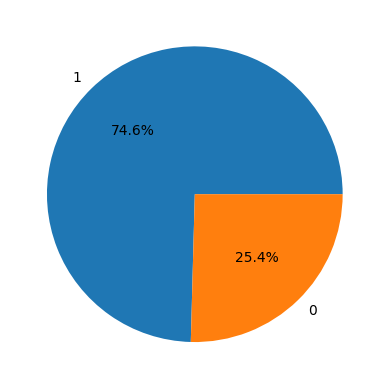

In [71]:
# Check whether the dataset is balanced for both the classes or not.
x = pd_data['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

Data imbalance exists

* 3. Data Standardization

In [75]:
X = pd_data.drop('class', axis=1)
y = pd_data['class']
 
X_train, X_test,y_train, y_test = train_test_split(X, y,
                                      test_size=0.2,
                                      random_state=10)
X_train.shape, X_test.shape

((604, 313), (151, 313))

In [89]:
X = pd_data.drop(columns=['class'])
y = pd_data['class']

In [88]:
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

I am going to choose Logistic Regression to build the model since they are recognized for their simplicity and efficacy for binary classification problems given the dataset size is reasonably modest (755 samples) and the number of characteristics is not very large. When trying to anticipate a binary result, logistic regression is frequently applied.

* 4. Model Training
  	


   

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\aswan\AI\FML\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [91]:
y_pred = model.predict(X_test)

* 5. Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.

In [93]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8145695364238411


In [108]:
from sklearn import metrics
print(metrics.classification_report
      (y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.47      0.60        45
           1       0.81      0.96      0.88       106

    accuracy                           0.81       151
   macro avg       0.82      0.71      0.74       151
weighted avg       0.82      0.81      0.80       151



* 6. Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.

In [94]:
instance = X.iloc[0]
instance = instance.values.reshape(1, -1)
instance_scaled = scaler.transform(instance)
prediction = model.predict(instance_scaled)
print(f"Predicted Class : {prediction[0]}")

Predicted Class : 1


c:\Users\aswan\AI\FML\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aswan\AI\FML\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Overall the model appears to do rather well, with high accuracy and recall for class 1, showing that it is more adept at accurately predicting instances of class 1 than other classes. The performance for class 0 is, however, noticeably lower, with lower recall, showing that it has trouble reliably identifying class 0 occurrences. It may be due to the data imbalance.
Given the class distribution in the test set, the weighted-average F1-score of 0.80 shows that the model's overall performance is respectably strong. 
